In [1]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt

In [30]:
def kmeans(dataset,k):
    centers = [] 
    for i in range(k):
        centers.append(initialize(dataset["matrix"]))
    for i in range(len(dataset["cluster"])):
        dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
    k = 0
    oldCenters = centers
    while(True):
        if k > 100:
            break
        elif change(centers,oldCenters) and k > 0:
            break
        oldCenters = centers
        for i in range(len(centers)):
            centers[i] = getCenter(getClusterPoints(dataset,i))
        for i in range(len(dataset["cluster"])):
            dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
        k+=1
        print(k)
    return dataset

In [4]:
def initialize(dataset):
    center = []
    for i in dataset:
        center.append(random.uniform(min(i),max(i)))
    return center

In [5]:
def getCenter(clusterPoints):
    newCenter = []
    for i in range(len(clusterPoints[0])):
        array = []
        for j in clusterPoints:
            array.append(j[i])
        newCenter.append(np.average(np.array(array)))
    return newCenter

In [6]:
def getList(dataset,feature):
    array = []
    for i in dataset:
        array.append(i[feature])
    return array

In [7]:
def getDistance(point1,point2):
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance

In [8]:
def getPoint(matrix,index):
    point = []
    for i in matrix:
        point.append(i[index])
    return point

In [23]:
def change(centers,oldCenters):
    change = False
    for i in range(len(centers)):
        if (getDistance(centers[i],oldCenters[i]) > 0.01):
            change = True
            break
    return change

In [10]:
def getCluster(point,centers):
    minDis = getDistance(centers[0],point)
    minPos = 0
    for i in range(1,len(centers)):
        dis = getDistance(centers[i],point)
        if minDis > dis:
            minDis = dis
            minPos = i
    return minPos

In [58]:
def getClusterPoints(dataset,cluster):
    clusterPoints = []
    for i in range(len(dataset["matrix"][0])):
        if dataset["cluster"][i] == cluster:
            clusterPoints.append(getPoint(dataset["matrix"],i))
    return clusterPoints

In [55]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in dataset[0]:
        if i != "cluster":
            cleanDataset["matrix"].append(getList(dataset,i))
        elif i == "cluster":
            cleanDataset["cluster"] = getList(dataset,"cluster")
    return cleanDataset

In [13]:
def normalize(array):
    norm = np.linalg.norm(np.array(array))
    for i in range(len(array)):
        array[i] = array[i]/norm
    return array

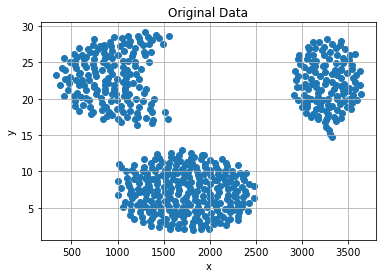

In [56]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("originalData1.png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


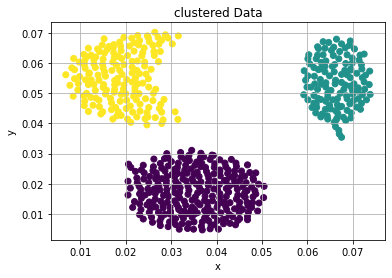

In [63]:
#print(getList(dataset,"cluster"))
for i in range(len(nDataset["matrix"])):
        nDataset["matrix"][i] = normalize(nDataset["matrix"][i])
nDataset = kmeans(nDataset,3)
plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1],c = nDataset["cluster"])
plt.title("clustered Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig("originalData1.png")   

In [ ]:
clusterCount = [0]*3
for i in range(5):
    clusterCount[i] = len(getClusterPoints(dataset,i))
    plt.bar([0,1,2,3,4],clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)

    plt.savefig("clusterLength.png")